In [1]:
import pandas as pd

# Load the dataset
file_path = r"D:\Excelr\Data Science\Data Science Assignment\Neural networks\Neural networks\Alphabets_data.csv"
data = pd.read_csv(file_path)

summary = {"Number of Samples": data.shape[0],"Number of Features": data.shape[1] - 1,
           "Number of Classes": data['class'].nunique() if 'class' in data.columns else 'Not Available'}
# missing values
missing_values = data.isnull().sum()

data_info = data.info()
first_rows = data.head()

summary, missing_values, first_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


({'Number of Samples': 20000,
  'Number of Features': 16,
  'Number of Classes': 'Not Available'},
 letter    0
 xbox      0
 ybox      0
 width     0
 height    0
 onpix     0
 xbar      0
 ybar      0
 x2bar     0
 y2bar     0
 xybar     0
 x2ybar    0
 xy2bar    0
 xedge     0
 xedgey    0
 yedge     0
 yedgex    0
 dtype: int64,
   letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
 0      T     2     8      3       5      1     8    13      0      6      6   
 1      I     5    12      3       7      2    10     5      5      4     13   
 2      D     4    11      6       8      6    10     6      2      6     10   
 3      N     7    11      6       6      3     5     9      4      6      4   
 4      G     2     1      3       1      1     8     6      6      6      6   
 
    x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
 0      10       8      0       8      0       8  
 1       3       9      2       8      4      10  
 2       3       7      3     

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# LabelEncoder and MinMaxScaler
label_encoder = LabelEncoder()
scaler = MinMaxScaler()
# Encode the target variable 'letter'
data['letter'] = label_encoder.fit_transform(data['letter'])
# Normalize the feature columns (excluding 'letter')
features = data.drop('letter', axis=1)
normalized_features = scaler.fit_transform(features)
# Combine normalized features with the encoded target
processed_data = pd.DataFrame(normalized_features, columns=features.columns)
processed_data['letter'] = data['letter']
# Display the processed data
processed_data.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333,19
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667,8
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000,3
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333,13
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667,6


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

data = pd.read_csv(r"D:\Excelr\Data Science\Data Science Assignment\Neural networks\Neural networks\Alphabets_data.csv")
label_encoder = LabelEncoder()
scaler = MinMaxScaler()
# Encode the target variable 'letter'
data['letter'] = label_encoder.fit_transform(data['letter'])
# Normalize the feature columns (excluding 'letter')
features = data.drop('letter', axis=1)
normalized_features = scaler.fit_transform(features)
# Combine normalized features with the encoded target
processed_data = pd.DataFrame(normalized_features, columns=features.columns)
processed_data['letter'] = data['letter']
# Split data into features and target
X = processed_data.drop('letter', axis=1)
y = to_categorical(processed_data['letter'], num_classes=len(label_encoder.classes_))
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Construct a basic ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 64 units
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 units
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer (softmax for classification)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1649 - loss: 3.0143 - val_accuracy: 0.4378 - val_loss: 1.9189
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5022 - loss: 1.7674 - val_accuracy: 0.5907 - val_loss: 1.4465
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6080 - loss: 1.4119 - val_accuracy: 0.6615 - val_loss: 1.2812
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6508 - loss: 1.2685 - val_accuracy: 0.6963 - val_loss: 1.1697
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6830 - loss: 1.1627 - val_accuracy: 0.7082 - val_loss: 1.0896
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7024 - loss: 1.0893 - val_accuracy: 0.7272 - val_loss: 1.0288
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7159 - loss: 1.0303 - val_accuracy: 0.7175 - val_loss: 1.0063
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7223 - loss: 0.9834 - val_accuracy: 0.

In [4]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# create the ANN model
def create_model(neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))  # Hidden layer
    model.add(Dense(neurons, activation=activation))  # Hidden layer
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# KerasClassifier from SciKeras
model = KerasClassifier(model=create_model, verbose=0)
# hyperparameter grid
param_grid = {'model__neurons': [32, 64, 128],'model__activation': ['relu', 'tanh'],'batch_size': [16, 32],'epochs': [10, 20],
              'model__learning_rate': [0.001, 0.01]}
# Implement RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=1, random_state=42)
# Fit the model with RandomizedSearchCV
random_search_result = random_search.fit(X_train, y_train)
# Best hyperparameters
best_params = random_search_result.best_params_
best_score = random_search_result.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__i

Best Hyperparameters: {'model__neurons': 64, 'model__learning_rate': 0.001, 'model__activation': 'tanh', 'epochs': 20, 'batch_size': 16}
Best Cross-Validation Accuracy: 0.8703753817759466


In [5]:
from sklearn.metrics import classification_report, accuracy_score

# Train the default model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# predict using the default model
y_pred_default = model.predict(X_test)
# Predict on the test set with the default model
y_pred_default_classes = y_pred_default.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)
# accuracy
accuracy_default = accuracy_score(y_test_classes, y_pred_default_classes)
# classification report
report_default = classification_report(y_test_classes, y_pred_default_classes)

print("Default Model Accuracy:", accuracy_default)
print("\nClassification Report for Default Model:\n", report_default)

Epoch 1/10


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1286 - loss: 3.1062 - val_accuracy: 0.4033 - val_loss: 2.1931
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4449 - loss: 1.9969 - val_accuracy: 0.5305 - val_loss: 1.6583
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5630 - loss: 1.5816 - val_accuracy: 0.6070 - val_loss: 1.4247
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6148 - loss: 1.3985 - val_accuracy: 0.6503 - val_loss: 1.2988
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6544 - loss: 1.2776 - val_accuracy: 0.6653 - val_loss: 1.2178
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6833 - loss: 1.1804 - val_accuracy: 0.6973 - val_loss: 1.1293
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6997 - loss: 1.1220 - val_accuracy: 0.7097 - val_loss: 1.0652
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7130 - loss: 1.0510 - val_accuracy: 0.7285 - val_

In [6]:
# Predict on the test set with the tuned model
y_pred_tuned = random_search_result.best_estimator_.predict(X_test)
y_pred_tuned_classes = y_pred_tuned.argmax(axis=1)
# Calculate accuracy
accuracy_tuned = accuracy_score(y_test_classes, y_pred_tuned_classes)
# classification report
report_tuned = classification_report(y_test_classes, y_pred_tuned_classes)

print("Tuned Model Accuracy:", accuracy_tuned)
print("\nClassification Report for Tuned Model:\n", report_tuned)

Tuned Model Accuracy: 0.90325

Classification Report for Tuned Model:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       149
           1       0.91      0.84      0.87       153
           2       0.91      0.90      0.90       137
           3       0.89      0.86      0.88       156
           4       0.89      0.88      0.89       141
           5       0.83      0.89      0.86       140
           6       0.86      0.91      0.88       160
           7       0.82      0.77      0.79       144
           8       0.97      0.88      0.92       146
           9       0.92      0.90      0.91       149
          10       0.85      0.88      0.86       130
          11       0.94      0.95      0.95       155
          12       0.95      0.95      0.95       168
          13       0.88      0.92      0.90       151
          14       0.75      0.94      0.83       145
          15       0.97      0.88      0.92       173
          

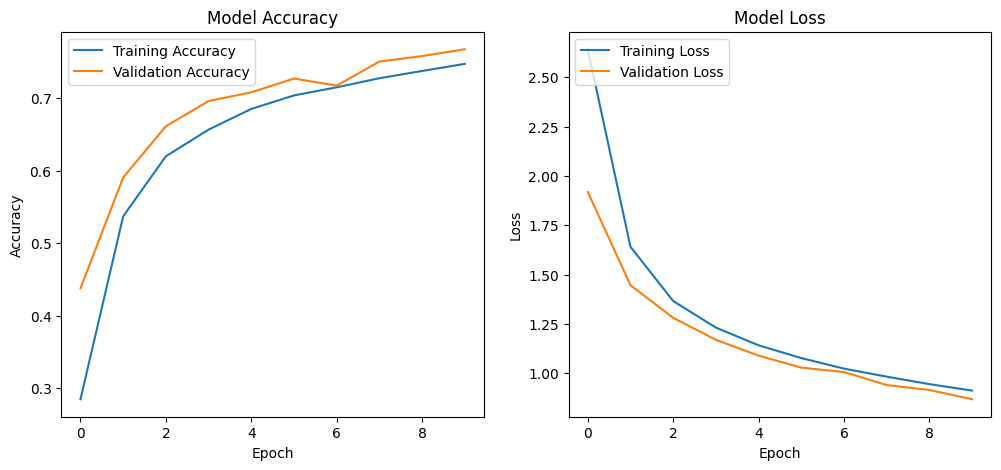

In [10]:
# Plot Training and Validation Curves
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Assuming `history` is from the training process:
plot_training_history(history)

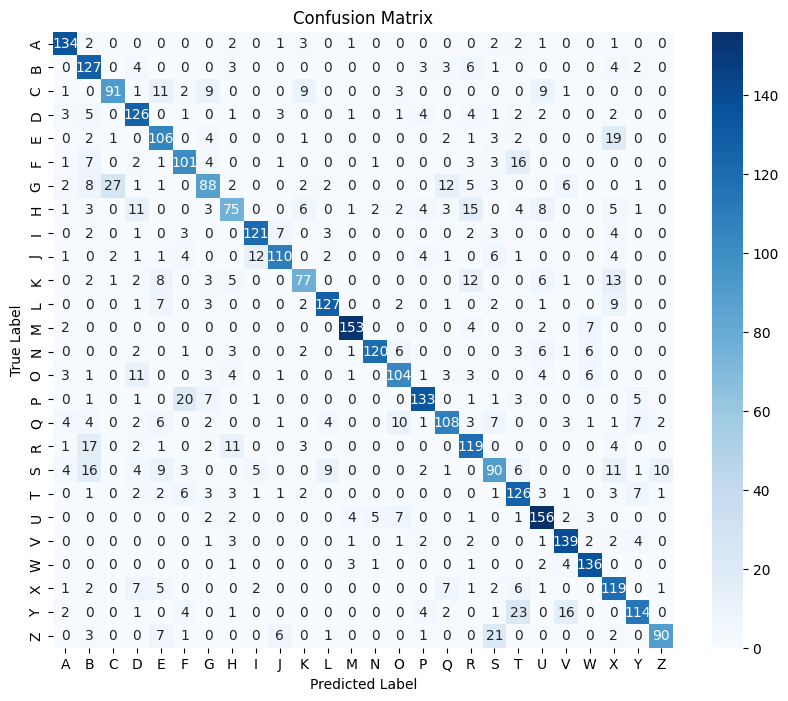

In [11]:
# Confusion Matrix Visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
def plot_confusion_matrix(y_true, y_pred_classes, labels):
    cm = confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Use the true and predicted values for the test set
y_test_classes = y_test.argmax(axis=1)  # Convert one-hot to class index
y_pred_default_classes = y_pred_default.argmax(axis=1)

# Assuming labels are the original class names
labels = label_encoder.classes_  # Get the alphabet class names

plot_confusion_matrix(y_test_classes, y_pred_default_classes, labels)

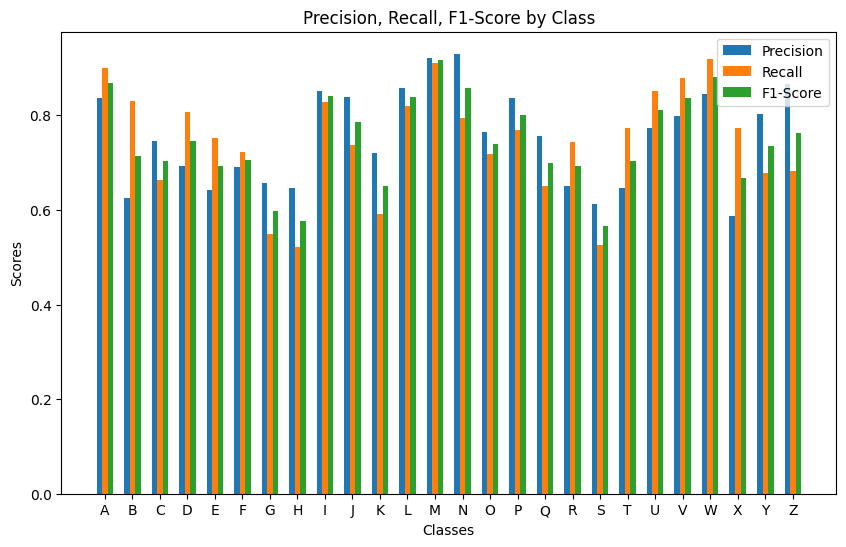

In [12]:
# Visualizing Precision, Recall, F1-Score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Get precision, recall, and F1-score for each class
precisions, recalls, f1s, _ = precision_recall_fscore_support(y_test_classes, y_pred_default_classes)

def plot_metrics(precisions, recalls, f1s, labels):
    x = np.arange(len(labels))  # Label locations
    width = 0.2  # Bar width

    plt.figure(figsize=(10, 6))
    
    # Plot bars
    plt.bar(x - width, precisions, width, label='Precision')
    plt.bar(x, recalls, width, label='Recall')
    plt.bar(x + width, f1s, width, label='F1-Score')

    # Labels and title
    plt.ylabel('Scores')
    plt.xlabel('Classes')
    plt.title('Precision, Recall, F1-Score by Class')
    plt.xticks(ticks=x, labels=labels)
    plt.legend()

    plt.show()

# Plot metrics for each class
plot_metrics(precisions, recalls, f1s, labels)